In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits

## Data exploration 

In [2]:
# Load thedigit and take a look at the data
(data, target) = load_digits(return_X_y=True)

features = pd.DataFrame(data)
label = pd.Series(target)

features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Text(0.5, 1.0, 'Row 1300')

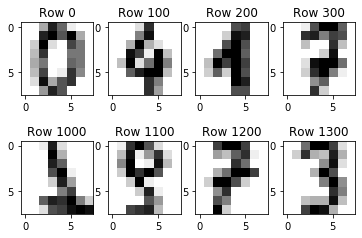

In [3]:
# Let's see what we got

fig, axs = plt.subplots(2, 4)
axs[0, 0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0, 0].set_title('Row 0')
axs[0, 1].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
axs[0, 1].set_title('Row 100')
axs[0, 2].imshow(features.iloc[200].values.reshape(8,8), cmap='gray_r')
axs[0, 2].set_title('Row 200')
axs[0, 3].imshow(features.iloc[300].values.reshape(8,8), cmap='gray_r')
axs[0, 3].set_title('Row 300')

axs[1, 0].imshow(features.iloc[1000].values.reshape(8,8), cmap='gray_r')
axs[1, 0].set_title('Row 1000')
axs[1, 1].imshow(features.iloc[1100].values.reshape(8,8), cmap='gray_r')
axs[1, 1].set_title('Row 1100')
axs[1, 2].imshow(features.iloc[1200].values.reshape(8,8), cmap='gray_r')
axs[1, 2].set_title('Row 1200')
axs[1, 3].imshow(features.iloc[1300].values.reshape(8,8), cmap='gray_r')
axs[1, 3].set_title('Row 1300')

## K Neighbors Classifier

Ok we have our data, now let's try to classify our digit with a simple method : the K Neighbors Classifier.

In [4]:
def cross_validate(model, X, y):
    return cross_val_score(model, X, y, cv=4) # 4 kfold

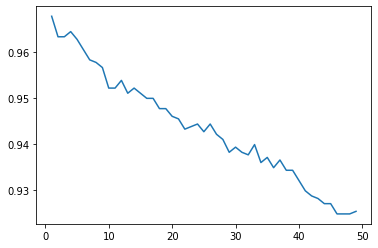

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

n_neighbors = range(1,50)
scores = {}
for n in n_neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    score = cross_validate(neigh, features, label)
    scores[n] = score.mean()

plt.plot(list(scores.keys()), list(scores.values()))

In [6]:
neigh = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(neigh, features, label, cv=4)
conf_mat = confusion_matrix(label, y_pred)

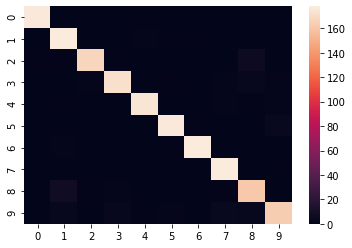

In [7]:
sns.heatmap(conf_mat)

The confusion matrix is a great tool for classifying problems to visualize our data is properly classified. 

## Multi layer perceptron

Now that we've tried the KNC, let's use a different method : the MultiLayerPerceptron (one of the first neural network model). To play around with this model, we'll change the number of hidden layers and number of neurons to see how our classification is impacted.

### 1 hidden layer

In [8]:
mlp_scores = {}
for i in range(3,9):
    mlp = MLPClassifier(hidden_layer_sizes=(i**2,), max_iter=1000)
    score = cross_validate(mlp, features, label)
    mlp_scores[i] = score.mean()

C:\Users\Louis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


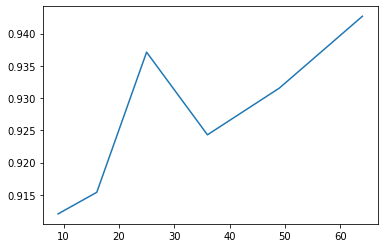

In [9]:
# Plot the score for the number of neuron used
plt.plot(list(map(lambda x : x**2,list(mlp_scores.keys()))), list(mlp_scores.values()))

Our result are not as good as with the KNC, but that's not a problem, we barely scratched what we can do with the MLP ! Let's add some layers, shall we.

### 2 hidden layers

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=1000)
score = cross_validate(mlp, features, label)
print(score.mean())

0.9415652066320218


### 3 hidden layers

In [11]:
activations = ["identity", "logistic", "tanh", "relu"]
hidden_layer_sizes = [10, 64, 128, 256]
activation_scores = []
for activation in activations:
    scores = []
    for n in hidden_layer_sizes:
        mlp = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter=1000, activation=activation)
        score = cross_validate(mlp, features, label)
        scores.append(score.mean())
    activation_scores.append(scores)

C:\Users\Louis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Louis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Louis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
activation_scores

[[0.906508290027221,
  0.9215293244246474,
  0.928765157139322,
  0.9287639198218263],
 [0.8330475129918338,
  0.9293219500123732,
  0.9398923533778768,
  0.9449072011878248],
 [0.8525290769611482,
  0.9298676070279634,
  0.9460158376639446,
  0.9521356099975253],
 [0.8920230141054194,
  0.94212571145756,
  0.9437824795842613,
  0.9565961395694135]]

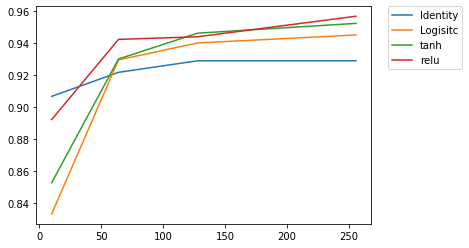

In [13]:
plt.plot(hidden_layer_sizes, activation_scores[0], label="Identity")
plt.plot(hidden_layer_sizes, activation_scores[1], label="Logisitc")
plt.plot(hidden_layer_sizes, activation_scores[2], label="tanh")
plt.plot(hidden_layer_sizes, activation_scores[3], label="relu")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


## Decision Tree

In [14]:
dt = DecisionTreeClassifier()
score = cross_validate(dt, features, label)
print(score.mean())

0.7857522890373669


## Random Forest

In [15]:
rf = RandomForestClassifier()
score = cross_validate(rf, features, label)
print(score.mean())

0.9365639693145261


## Sum up of different methods

Here we tried several classifying algorithms :
- Knn
- MLP 1 layer
- MLP 2 layer
- MLP 3 layer
(with diff activation function)
- Decision Tree
- Random forest

And good fairly good results with Knn, 3 layered MLP and Random forest. But the score does not necesserally mean we'll get a good generalisation (when observing new data, although we used

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.41775114
Iteration 2, loss = 0.14525980
Iteration 3, loss = 0.11635640
Iteration 4, loss = 0.09684420
Iteration 5, loss = 0.08344281
Iteration 6, loss = 0.07501994
Iteration 7, loss = 0.07022565
Iteration 8, loss = 0.06402937
Iteration 9, loss = 0.05805703
Iteration 10, loss = 0.05718866
Training set score: 0.986183
Test set score: 0.970300


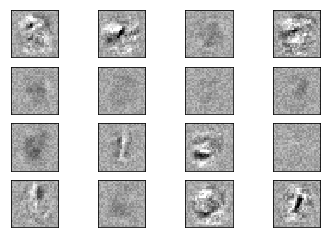

In [16]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(64,64,64), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()